In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [72]:
file_path = 'preprocessed_data.csv'
data = pd.read_csv(file_path)
data

,OBJECTID,FACILITYID,INTID,SALESFORCEID,SUBTYPEID,NAME,ADDRESS,OWNERSHIP,TOTALSPACECOUNT,EVSPACECOUNT,...,PARKINGTYPE,NUMBEROFLEVELS,PERMITS,BIPLEASE,BIPAREA,CREATIONDATE,LASTUPDATE,NOTES,SHAPE_Length,SHAPE_Area
0,2,2,2,0.0,0.0,SJ State University 7th Street,,SJSU Parking,1980.0,6.0,...,Lot,1.0,0.0,0.0,0.0,0.0,2021/06/23 00:08:34+00,none,1434.256565,123290.02960
1,4,4,4,0.0,0.0,SJ State University 10th Street Garage,,SJSU Parking,1490.0,6.0,...,Lot,1.0,0.0,0.0,0.0,0.0,2021/06/23 00:08:34+00,none,1584.074221,132667.95220
2,5,5,5,0.0,0.0,Cahill Lot 4 (Caltrain 4),"4 Cahill Street, San Jose, CA",City of San Jose,149.0,6.0,...,Lot,1.0,0.0,0.0,0.0,0.0,2021/06/23 00:08:34+00,none,936.989709,54333.35930
3,6,6,6,0.0,0.0,Cahill Lot 2 (Caltrain 2),"21 Cahill Street, San Jose, CA",City of San Jose,162.0,6.0,...,Lot,1.0,0.0,0.0,0.0,0.0,2021/06/23 00:08:34+00,none,947.398405,55899.87649
4,7,7,7,0.0,0.0,Cahill Lot 3 (Caltrain 3),71 Cahill Street,City of San Jose,90.0,6.0,...,Lot,1.0,0.0,0.0,0.0,0.0,2021/06/23 00:08:34+00,none,778.829121,37121.44225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,89,89,89,0.0,0.0,New Adobe Garage,"W San Fernando, San Jose, CA",Privately Owned Parking with Public Access,1271.0,6.0,...,Lot,1.0,0.0,0.0,0.0,0.0,2023/10/02 19:27:04+00,none,1202.786101,87525.30374
85,90,90,90,0.0,0.0,Delmas East,"374 West Santa Clara Street, San Jose, CA",Privately Owned Parking with Public Access,568.0,6.0,...,Lot,1.0,0.0,0.0,0.0,0.0,2023/10/02 19:27:04+00,none,1631.170318,134002.50010
86,91,91,91,0.0,0.0,Delmas West,"374 West Santa Clara Street, San Jose, CA",Privately Owned Parking with Public Access,326.0,6.0,...,Lot,1.0,0.0,0.0,0.0,0.0,2023/10/02 19:27:04+00,none,1513.552781,112651.33320
87,92,92,92,0.0,0.0,Delmas North,"374 West Santa Clara Street, San Jose, CA",Privately Owned Parking with Public Access,568.0,6.0,...,Lot,1.0,0.0,0.0,0.0,0.0,2023/10/02 19:27:04+00,none,1393.005529,50137.79383


In [73]:
data['NAME'] = data['NAME'].astype('category')
data['NAME'] = data['NAME'].cat.codes

data['ADDRESS'] = data['ADDRESS'].astype('category')
data['ADDRESS'] = data['ADDRESS'].cat.codes

data['OWNERSHIP'] = data['OWNERSHIP'].astype('category')
data['OWNERSHIP'] = data['OWNERSHIP'].cat.codes

data['PARKINGTYPE'] = data['PARKINGTYPE'].astype('category')
data['PARKINGTYPE'] = data['PARKINGTYPE'].cat.codes

data['NOTES'] = data['NOTES'].astype('category')
data['NOTES'] = data['NOTES'].cat.codes

data['VALIDATION'] = data['VALIDATION'].astype('category')
data['VALIDATION'] = data['VALIDATION'].cat.codes

data['LASTUPDATE'] = data['LASTUPDATE'].astype('category')
data['LASTUPDATE'] = data['LASTUPDATE'].cat.codes


In [74]:
data

,OBJECTID,FACILITYID,INTID,SALESFORCEID,SUBTYPEID,NAME,ADDRESS,OWNERSHIP,TOTALSPACECOUNT,EVSPACECOUNT,...,PARKINGTYPE,NUMBEROFLEVELS,PERMITS,BIPLEASE,BIPAREA,CREATIONDATE,LASTUPDATE,NOTES,SHAPE_Length,SHAPE_Area
0,2,2,2,0.0,0.0,68,0,3,1980.0,6.0,...,1,1.0,0.0,0.0,0.0,0.0,0,0,1434.256565,123290.02960
1,4,4,4,0.0,0.0,66,0,3,1490.0,6.0,...,1,1.0,0.0,0.0,0.0,0.0,0,0,1584.074221,132667.95220
2,5,5,5,0.0,0.0,29,40,0,149.0,6.0,...,1,1.0,0.0,0.0,0.0,0.0,0,0,936.989709,54333.35930
3,6,6,6,0.0,0.0,27,20,0,162.0,6.0,...,1,1.0,0.0,0.0,0.0,0.0,0,0,947.398405,55899.87649
4,7,7,7,0.0,0.0,28,64,0,90.0,6.0,...,1,1.0,0.0,0.0,0.0,0.0,0,0,778.829121,37121.44225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,89,89,89,0.0,0.0,57,74,2,1271.0,6.0,...,1,1.0,0.0,0.0,0.0,0.0,4,0,1202.786101,87525.30374
85,90,90,90,0.0,0.0,39,39,2,568.0,6.0,...,1,1.0,0.0,0.0,0.0,0.0,4,0,1631.170318,134002.50010
86,91,91,91,0.0,0.0,41,39,2,326.0,6.0,...,1,1.0,0.0,0.0,0.0,0.0,4,0,1513.552781,112651.33320
87,92,92,92,0.0,0.0,40,39,2,568.0,6.0,...,1,1.0,0.0,0.0,0.0,0.0,4,0,1393.005529,50137.79383


In [75]:
X = data.drop('TOTALSPACECOUNT', axis=1)
y = data['TOTALSPACECOUNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
model = DecisionTreeClassifier()

In [77]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred = model.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\Jayesh vala\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jayesh vala\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jayesh vala\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jayesh vala\

In [94]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.845
Classification Report:
               precision    recall  f1-score   support

        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         0
        25.0       0.00      0.00      0.00         1
        40.0       1.00      1.00      1.00         1
        50.0       0.00      0.00      0.00         0
        70.0       0.00      0.00      0.00         0
        71.0       0.00      0.00      0.00         0
        90.0       0.00      0.00      0.00         2
        97.0       0.00      0.00      0.00         1
       113.0       0.00      0.00      0.00         2
       130.0       0.00      0.00      0.00         1
       142.0       0.00      0.00      0.00         1
       154.0       0.00      0.00      0.00         0
       189.0       0.00      0.00      0.00         0
       258.0       0.00      0.00      0.00         1
       277.0       0.00      0.00      0.00         1
       390.0       0.00      0.00      0.

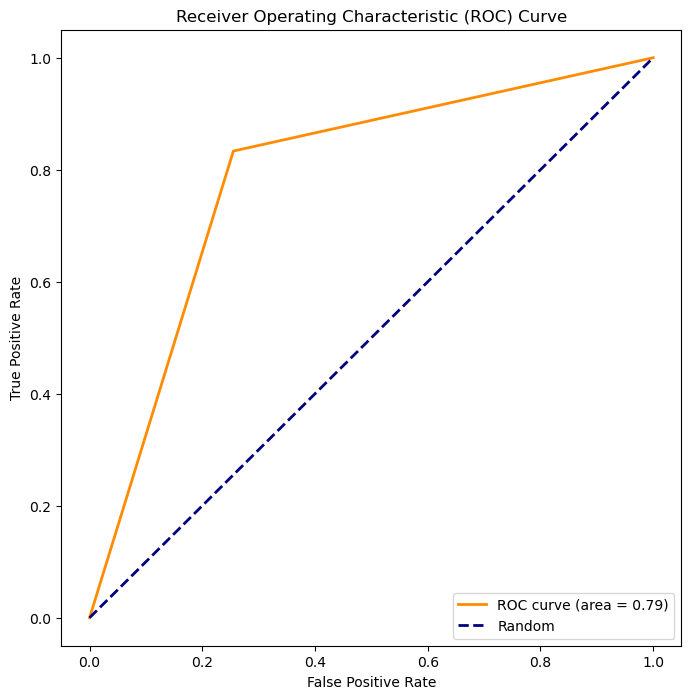

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Convert the regression problem to a binary classification problem
# For example, you can set a threshold to classify as positive or negative
threshold = 0.5
y_binary = (y > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor (replace with your own model)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Get predicted values
y_pred = model.predict(X_test)

# Convert predicted values to binary predictions based on the threshold
y_binary_pred = (y_pred > threshold).astype(int)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Generate synthetic data for classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Decision Tree Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)


Decision Tree Accuracy: 0.845
Confusion Matrix:
[[84  9]
 [22 85]]


In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic data for regression
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Calculate MAE, MSE, RMSE, and MAPE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 104.23174785758627
Mean Squared Error (MSE): 17560.980751001596
Root Mean Squared Error (RMSE): 132.5178506881303
Mean Absolute Percentage Error (MAPE): 1047.85%


In [91]:
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Generate synthetic data for classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Decision Tree Precision: {precision}')
print('Confusion Matrix:')
print(conf_matrix)


Decision Tree Precision: 0.9157894736842105
Confusion Matrix:
[[85  8]
 [20 87]]
